In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *
from public_tests import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [3]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

non-cat


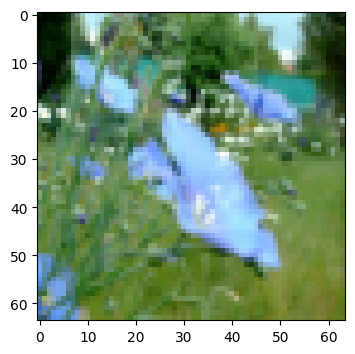

In [7]:
index = 20

plt.imshow(train_x_orig[index])

print(classes[train_y[0,index]].decode("utf-8"))

In [16]:
#flatten

train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0],-1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0],-1).T
train_x_flatten.shape

(12288, 209)

In [17]:
train_x = train_x_flatten/255
test_x = test_x_flatten/255

print(train_x.shape)
print(test_x.shape)

(12288, 209)
(12288, 50)


In [18]:
#2 layer neural network

n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.0075

In [ ]:
def two_layer_model(X, Y, layer_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = False):
    
    n_x = X.shape[1]
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    A
    
    